# Clustering Analysis of Marketing Data

In [118]:
!pip install plotly

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,normalize

https://www.kaggle.com/rodsaldanha/arketing-campaign

* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

In [120]:
df = pd.read_csv("C:/Users/imoge/Projects/Datasets/marketing_campaign.csv")

In [121]:
df.shape

(2240, 29)

In [122]:
df.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138,46344,71613,26646,58293
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04/09/12,08/03/14,21/08/13,10/02/14,19/01/14
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


In [123]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [124]:
# Drop columns not needed
df = df.drop(columns = ['ID', 'Education','Marital_Status','AcceptedCmp1',
       'AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Complain','Response'],axis = 1)

In [125]:
df.shape

(2240, 19)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Dt_Customer          2240 non-null   object 
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [127]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [128]:
df.isnull().sum()

Year_Birth              0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Z_CostContact           0
Z_Revenue               0
dtype: int64

In [129]:
df = df.dropna()

## Feature Engineering

In [130]:
# Combine purchases into total purchases
df["Total"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"]+ df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [131]:
# Combine number of kids and teens to total children
df["Children"] = df["Kidhome"] + df["Teenhome"]

In [132]:
# Combine all the website activity into purchases
df["Purchases"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"] + df["NumWebVisitsMonth"]

In [133]:
df = df.drop(columns = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds",
                  "Kidhome","Teenhome","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"],axis = 1)

In [134]:
df.head()

,Year_Birth,Income,Dt_Customer,Recency,Z_CostContact,Z_Revenue,Total,Children,Purchases
0,1957,58138.0,2012-04-09,58,3,11,1617,0,32
1,1954,46344.0,2014-08-03,38,3,11,27,2,11
2,1965,71613.0,2013-08-21,26,3,11,776,0,25
3,1984,26646.0,2014-10-02,26,3,11,53,1,14
4,1981,58293.0,2014-01-19,94,3,11,422,1,24


In [135]:
# Get the time a person has been a customer of the store - number of months
dt = pd.to_datetime('2021/12/23', format = '%Y/%m/%d')
df["Length_custom"] = (dt - df["Dt_Customer"]).dt.days
df["Length_custom"] = (df["Length_custom"]/30).astype("int")
df = df.drop(columns = ["Dt_Customer"],axis = 1)

In [136]:
# Get age of customer
df["Age"] = 2021 - df["Year_Birth"]
df = df.drop(columns = ["Year_Birth"],axis = 1)
df.head()

,Income,Recency,Z_CostContact,Z_Revenue,Total,Children,Purchases,Length_custom,Age
0,58138.0,58,3,11,1617,0,32,118,64
1,46344.0,38,3,11,27,2,11,89,67
2,71613.0,26,3,11,776,0,25,101,56
3,26646.0,26,3,11,53,1,14,87,37
4,58293.0,94,3,11,422,1,24,96,40


In [137]:
df.describe()

,Income,Recency,Z_CostContact,Z_Revenue,Total,Children,Purchases,Length_custom,Age
count,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,3.0,11.0,607.075361,0.947202,20.199910,102.404783,52.179603
std,25173.076661,28.948352,0.0,0.0,602.900476,0.749062,7.283193,7.785033,11.985554
min,1730.000000,0.000000,3.0,11.0,5.000000,0.000000,0.000000,85.000000,25.000000
25%,35303.000000,24.000000,3.0,11.0,69.000000,0.000000,14.000000,97.000000,44.000000
50%,51381.500000,49.000000,3.0,11.0,396.500000,1.000000,19.000000,102.000000,51.000000
75%,68522.000000,74.000000,3.0,11.0,1048.000000,1.000000,25.000000,108.000000,62.000000
max,666666.000000,99.000000,3.0,11.0,2525.000000,3.000000,46.000000,121.000000,128.000000


In [138]:
# Drop three columns which have a very low standard deviation (not much use for clustering)
df = df.drop(columns = ["Children", "Z_CostContact","Z_Revenue"],axis = 1)

In [139]:
df.head()

,Income,Recency,Total,Purchases,Length_custom,Age
0,58138.0,58,1617,32,118,64
1,46344.0,38,27,11,89,67
2,71613.0,26,776,25,101,56
3,26646.0,26,53,14,87,37
4,58293.0,94,422,24,96,40


## Data Visualisation

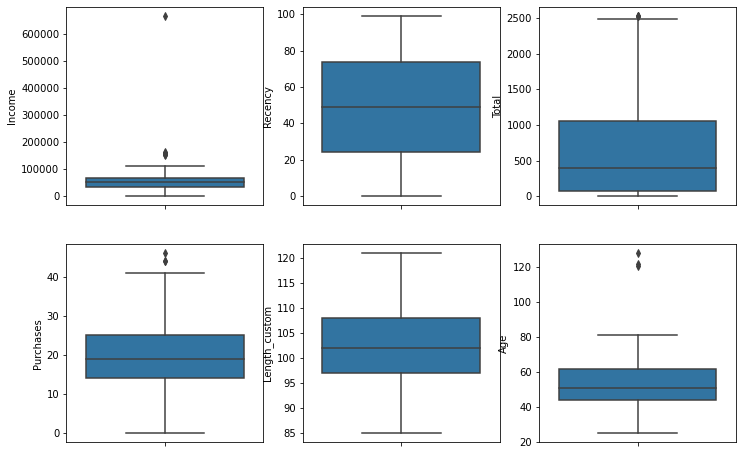

In [140]:
fig, axs = plt.subplots(figsize = (12,8), nrows = 2, ncols = 3, sharey = False)
sns.boxplot(y = df["Income"],ax = axs[0][0])
sns.boxplot(y = df["Recency"],ax = axs[0][1])
sns.boxplot(y = df["Total"],ax = axs[0][2])
sns.boxplot(y = df["Purchases"],ax = axs[1][0])
sns.boxplot(y = df["Length_custom"],ax = axs[1][1])
sns.boxplot(y = df["Age"], ax = axs[1][2]);

There are outliers in the data. KMeans does not work well with outliers so need to remove values with extreme values

In [141]:
# Use the pandas clip function to clip values above and below specified threshold values (below 5% and above 95%)
df['Purchases'].clip(
    lower = df['Purchases'].quantile(0.05), 
    upper = df['Purchases'].quantile(0.95), inplace = True)

df['Total'].clip(
    lower = df['Total'].quantile(0.05), 
    upper = df['Total'].quantile(0.95), inplace = True)

df['Income'].clip(
    lower = df['Income'].quantile(0.05), 
    upper = df['Income'].quantile(0.95), inplace = True)

df['Age'].clip(
    lower = df['Age'].quantile(0.05), 
    upper = df['Age'].quantile(0.95), inplace = True)      

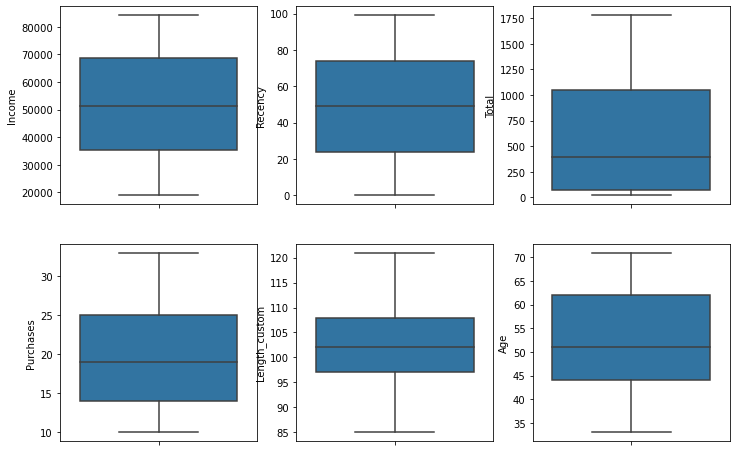

In [142]:
fig, axs = plt.subplots(figsize = (12,8), nrows = 2, ncols = 3, sharey = False)
sns.boxplot(y = df["Income"],ax = axs[0][0])
sns.boxplot(y = df["Recency"],ax = axs[0][1])
sns.boxplot(y = df["Total"],ax = axs[0][2])
sns.boxplot(y = df["Purchases"],ax = axs[1][0])
sns.boxplot(y = df["Length_custom"],ax = axs[1][1])
sns.boxplot(y = df["Age"], ax = axs[1][2]);

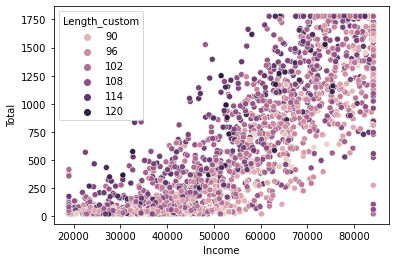

In [143]:
# Scatterplot of the Income against total amount spent split by length of time the person has been a customer
sns.scatterplot(data = df, x = "Income",y = "Total", hue = "Length_custom");

Longer length customers tend to spend more

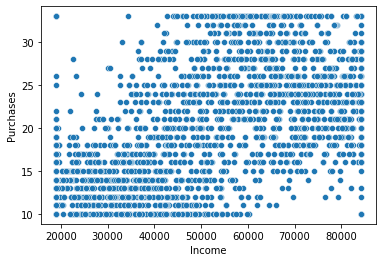

In [144]:
# Scatterplot of the Income against total amount spent split by purchases and web visits
sns.scatterplot(data = df, x = "Income",y = "Purchases");

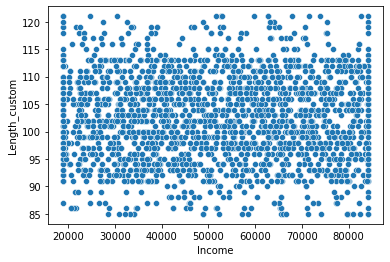

In [145]:
# Scatterplot of the Income against total amount spent split by length of time a person has been a customer
sns.scatterplot(data = df, x = "Income",y = "Length_custom");

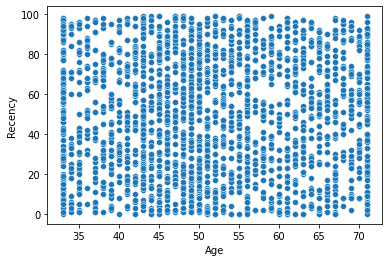

In [146]:
# Scatterplot of the Income against total amount spent split by length of time the person has been a customer
sns.scatterplot(data = df, x = "Age",y = "Recency");

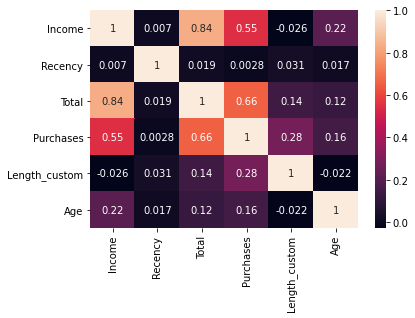

In [147]:
sns.heatmap(df.corr(),annot = True);

* There is some positive relationship between income and total spend and purchases and web visits
* Total amount spend and customer purchases and visits are correlated as expected so only one will be included in the model
* The relationship between age and the other features is fairly weak
* There is no real relationship between the length of custom and other features except purchases
* Three features will be used - income, purchases, length of custom

In [148]:
# Create an interactive plot with plotly express
fig = px.scatter_3d(df, x = 'Length_custom', y = 'Income', 
                    z = 'Total',size_max=5,opacity=0.7)

fig.show()

## Data Standardisation

In [150]:
df = df[["Income","Total","Length_custom"]]
df.head()

,Income,Total,Length_custom
0,58138.0,1617.0,118
1,46344.0,27.0,89
2,71613.0,776.0,101
3,26646.0,53.0,87
4,58293.0,422.0,96


In [151]:
df.describe()

,Income,Total,Length_custom
count,2216.000000,2216.000000,2216.000000
mean,51751.716832,595.727775,102.404783
std,19773.406544,575.677268,7.785033
min,18985.500000,22.000000,85.000000
25%,35303.000000,69.000000,97.000000
50%,51381.500000,396.500000,102.000000
75%,68522.000000,1048.000000,108.000000
max,84130.000000,1778.250000,121.000000


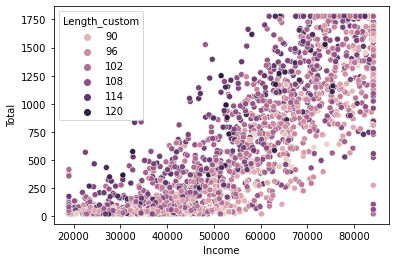

In [153]:
sns.scatterplot(data = df, x = "Income", y = "Total", hue = "Length_custom");

In [156]:
# Scale the data
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [158]:
scaled.head()

,Income,Total,Length_custom
0,0.323046,1.774436,2.003683
1,-0.273546,-0.988151,-1.722255
2,1.004671,0.313219,-0.180487
3,-1.269957,-0.942977,-1.979216
4,0.330887,-0.301848,-0.822890


In [161]:
# Normalize the data (based on rows is expressed in unit norm)
norm = pd.DataFrame(data = normalize(scaled, norm = 'l2'),columns = scaled.columns)

In [163]:
norm.describe() # sum of the squares of the value = 1

,Income,Total,Length_custom
count,2216.000000,2216.000000,2216.000000
mean,-0.016287,-0.076100,0.001522
std,0.572667,0.577021,0.577486
min,-0.985926,-0.996866,-0.999454
25%,-0.574820,-0.559434,-0.529086
50%,-0.017950,-0.339716,-0.027290
75%,0.533511,0.527777,0.512177
max,0.984484,0.989256,0.999365


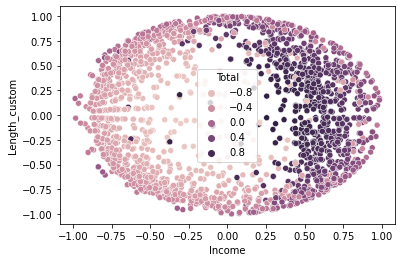

In [167]:
sns.scatterplot(data = norm, y = "Length_custom", x = "Income", hue = "Total");

## Build Clustering Model

C:\Users\imoge\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.



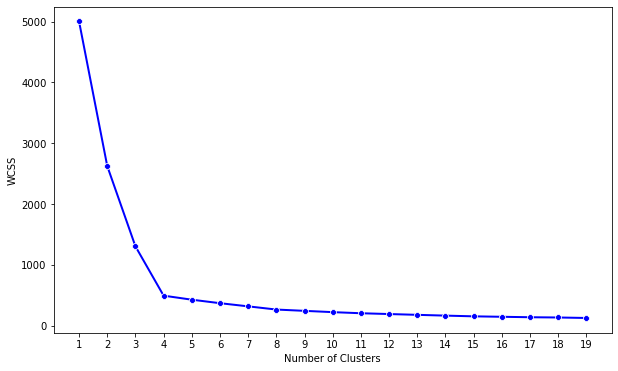

In [188]:
# Get the weighted cluster of squares for a range of different cluster numbers
weighted_cluster_sum_of_squares = []
for k in range(1, 20):
    kmeans_model = KMeans(n_clusters = k, random_state = 1)
    kmeans_model.fit(norm)
    weighted_cluster_sum_of_squares.append(kmeans_model.inertia_)

# Plot the elbow curve
plt.figure(figsize = (10, 6))    
sns.lineplot(x = range(1, 20), y = weighted_cluster_sum_of_squares, 
             linewidth = 2, color = 'blue' , marker = '8')

plt.xlabel('Number of Clusters')
plt.xticks(np.arange(1, 20, 1))

plt.ylabel('WCSS')
plt.show()

In [176]:
# Get the silhouette score for the same range
silhouette_avg = []
for num_clusters in range(2, 20):
    kmeans_model = KMeans(n_clusters = num_clusters, random_state = 123)
    kmeans_model.fit(norm)
    cluster_labels = kmeans_model.labels_
    silhouette_avg.append(silhouette_score(norm, cluster_labels))
silhouette_avg

[0.47978577614348905,
 0.4598068575888887,
 0.4400888294661432,
 0.4143353718768167,
 0.39702424871336056,
 0.3767262167035278,
 0.3611025398315455,
 0.3729323742537097,
 0.38162542021898765,
 0.36822877213789773,
 0.35559074801363105,
 0.355286686726801,
 0.34933774350941904,
 0.3381786380541538,
 0.34172602458257934,
 0.3358930628744183,
 0.34372524180972647,
 0.333661187391453]

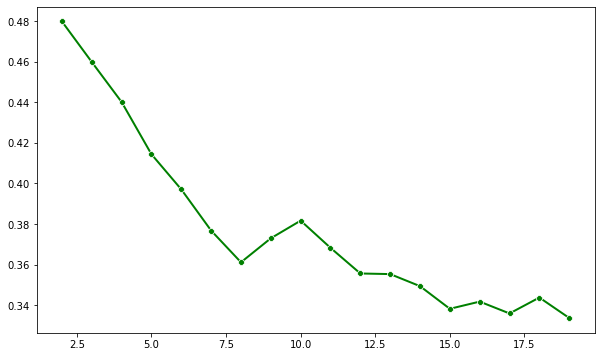

In [189]:
# Plot the elbow curve
plt.figure(figsize = (10,6))
sns.lineplot(x = range(2, 20), y = silhouette_avg, 
             linewidth = 2, color = 'green' , marker = '8') 

plt.show()

Go with 4 clusters

In [191]:
# Define the model with 4 clusters and fit. Get the labels and append to the normalized dataframe
kmeans_model = KMeans(n_clusters = 4, random_state = 123)
kmeans_model.fit(norm)
norm['cluster_labels'] = kmeans_model.labels_
norm.head()

,Income,Total,Length_custom,cluster_labels
0,0.119830,0.658205,0.743241,0
1,-0.136476,-0.493003,-0.859257,1
2,0.940942,0.293350,-0.169039,2
3,-0.501240,-0.372184,-0.781177,1
4,0.353179,-0.322184,-0.878329,1


In [186]:
# Get the mean of each cluster
df.groupby('cluster_labels').mean()

,Income,Total,Length_custom
cluster_labels,,,
0,38630.967147,128.745192,95.626603
1,34899.635225,178.283806,108.317195
2,68576.787619,1188.574286,109.247619
3,71940.995726,1087.611645,96.198718


In [187]:
# Get the centroids for each cluster
centers = kmeans_model.cluster_centers_
centers

array([[-3.96977142e-01, -5.67009746e-01, -5.53524971e-01,
         2.00000000e+00],
       [-5.30651749e-01, -5.06020135e-01,  4.94616488e-01,
         1.33226763e-15],
       [ 4.74966039e-01,  5.28783469e-01,  5.11039622e-01,
         3.00000000e+00],
       [ 5.98556666e-01,  4.50152684e-01, -4.61107710e-01,
         1.00000000e+00]])

* Cluster-1 is The Highest Avg Income , High Avg Amount spent and Low Avg Length of Association
* Cluster-2 is The Low Avg Income , Lowest Avg Amount spent and Lowest Avg Length of Association.
* Cluster-3 is The High Avg Income , Highest Avg Amount spent and Highest Avg Length of Association
* Cluster-0 is The Lowest Avg Income , Low Avg Amount spent and High Avg Length of Association

In [192]:
# Apply the labels to the original dataframe
df['cluster_labels'] = kmeans_model.labels_
df.groupby('cluster_labels').mean()

,Income,Total,Length_custom
cluster_labels,,,
0,68576.787619,1188.574286,109.247619
1,38630.967147,128.745192,95.626603
2,71940.995726,1087.611645,96.198718
3,34899.635225,178.283806,108.317195


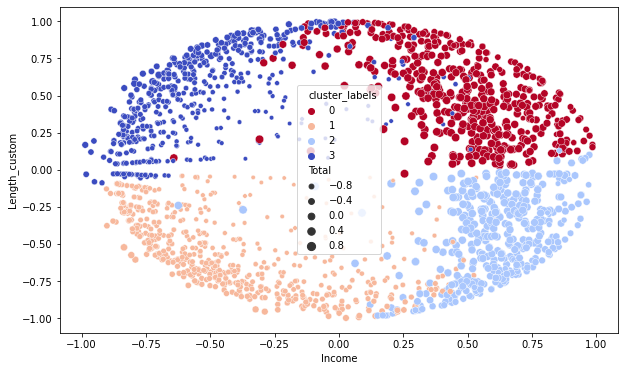

In [197]:
# Scatterplot based on the normalised data
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Income', y = 'Length_custom', 
                size = 'Total', 
                hue = 'cluster_labels', 
                data = norm, palette = 'coolwarm_r');

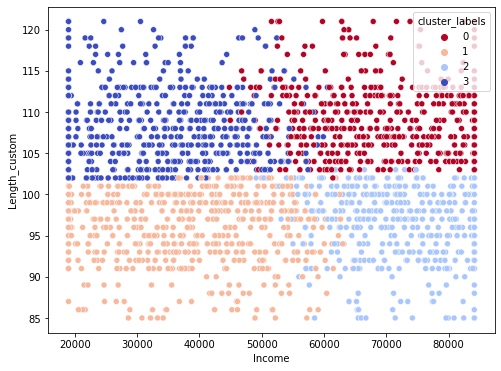

In [201]:
# Scatterplot based on the original data
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'Income',y = 'Length_custom', 
                hue = 'cluster_labels', 
                data = df, 
                palette = 'coolwarm_r');

In [203]:
# Interactive plot showing the clusters
fig = px.scatter_3d(norm, x = 'Length_custom', y = 'Income', 
                    z = 'Total', color = 'cluster_labels')

fig.show()